Income classification
Prediction task is to determine whether a person makes over 50K a year.


https://www.kaggle.com/lodetomasi1995/income-classification


In [98]:
%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## Data Import

In [99]:
data = pd.read_csv('https://raw.githubusercontent.com/ceccode/mlbookcamp/main/datasets/income_evaluation.csv')

In [100]:
print(data.shape)

(32561, 15)


In [101]:
data.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [102]:
df = data

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [104]:
df.columns = df.columns.str.lower().str.strip()

strings = list(df.dtypes[df.dtypes == 'object'].index)

for col in strings:
    df[col] = df[col].str.lower().str.strip()


for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

age
[39 50 38 53 28]
73

workclass
['state-gov' 'self-emp-not-inc' 'private' 'federal-gov' 'local-gov']
9

fnlwgt
[ 77516  83311 215646 234721 338409]
21648

education
['bachelors' 'hs-grad' '11th' 'masters' '9th']
16

education-num
[13  9  7 14  5]
16

marital-status
['never-married' 'married-civ-spouse' 'divorced' 'married-spouse-absent'
 'separated']
7

occupation
['adm-clerical' 'exec-managerial' 'handlers-cleaners' 'prof-specialty'
 'other-service']
15

relationship
['not-in-family' 'husband' 'wife' 'own-child' 'unmarried']
6

race
['white' 'black' 'asian-pac-islander' 'amer-indian-eskimo' 'other']
5

sex
['male' 'female']
2

capital-gain
[ 2174     0 14084  5178  5013]
119

capital-loss
[   0 2042 1408 1902 1573]
92

hours-per-week
[40 13 16 45 50]
94

native-country
['united-states' 'cuba' 'jamaica' 'india' '?']
42

income
['<=50k' '>50k']
2



In [105]:
df.mode()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,36.0,private,123011,hs-grad,9.0,married-civ-spouse,prof-specialty,husband,white,male,0.0,0.0,40.0,united-states,<=50k
1,NaN,NaN,164190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,203488,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Remove duplicates

In [106]:
df.shape

(32561, 15)

In [107]:
df.duplicated().value_counts()

False    32537
True        24
dtype: int64

In [108]:
df = df.drop_duplicates()

In [109]:
df.shape

(32537, 15)

### Descriptive Statistics

In [110]:
df.describe(percentiles=[.0, .25, .5, .75, .9, .95, .99, .1]).T

,count,mean,std,min,0%,10%,25%,50%,75%,90%,95%,99%,max
age,32537.0,38.585549,13.637984,17.0,17.0,22.0,28.0,37.0,48.0,58.0,63.0,74.0,90.0
fnlwgt,32537.0,189780.848511,105556.471009,12285.0,12285.0,65724.4,117827.0,178356.0,236993.0,329056.0,379699.2,510072.0,1484705.0
education-num,32537.0,10.081815,2.571633,1.0,1.0,7.0,9.0,10.0,12.0,13.0,14.0,16.0,16.0
capital-gain,32537.0,1078.443741,7387.957424,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5013.0,15024.0,99999.0
capital-loss,32537.0,87.368227,403.101833,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1980.0,4356.0
hours-per-week,32537.0,40.440329,12.346889,1.0,1.0,24.0,40.0,40.0,45.0,55.0,60.0,80.0,99.0


In [111]:
df.describe(include=["O"]).T

,count,unique,top,freq
workclass,32537,9,private,22673
education,32537,16,hs-grad,10494
marital-status,32537,7,married-civ-spouse,14970
occupation,32537,15,prof-specialty,4136
relationship,32537,6,husband,13187
race,32537,5,white,27795
sex,32537,2,male,21775
native-country,32537,42,united-states,29153
income,32537,2,<=50k,24698


In [112]:
df.income = (df.income == '>50k').astype(int)
df.income.value_counts()

0    24698
1     7839
Name: income, dtype: int64

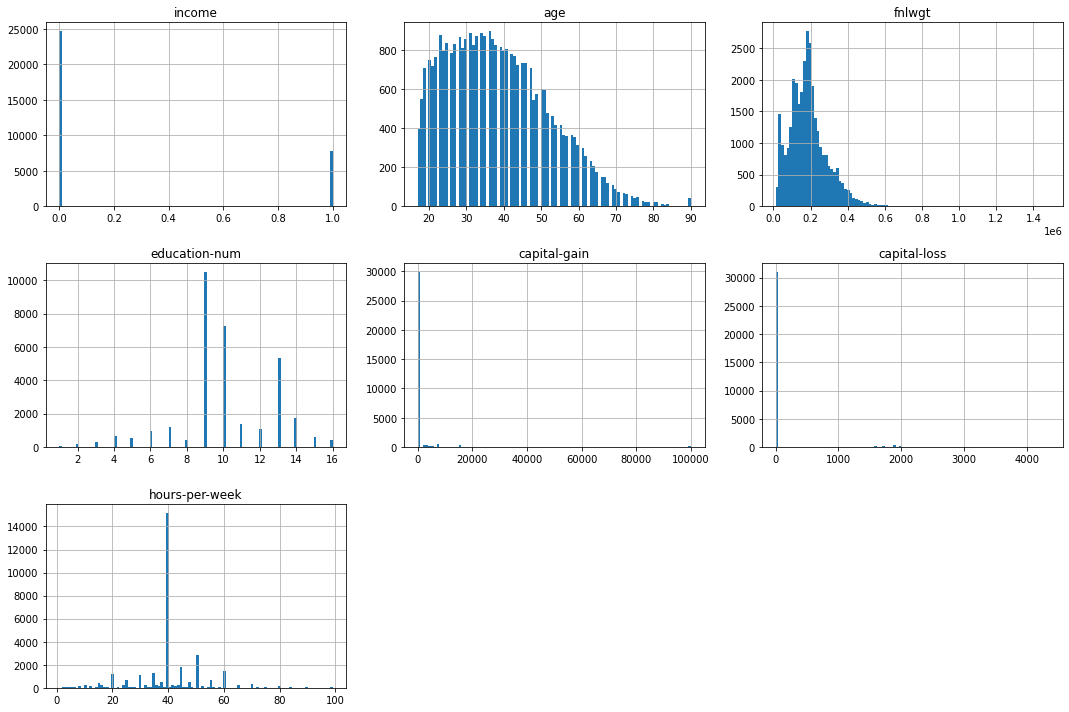

In [113]:
fig = plt.figure(figsize=(15,10))
ax = plt.gca()
df.hist(bins=100, ax=ax, layout=(3, 3), column=['income', 'age','fnlwgt','education-num','capital-gain','capital-loss', 'hours-per-week'])
plt.tight_layout()
plt.show()

train, val, test set will be 60%, 20%, 20% of the dataset respectively

In [114]:
from sklearn.model_selection import train_test_split

In [115]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [116]:
len(df_train), len(df_val), len(df_test)

(19521, 6508, 6508)

In [117]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.income.values
y_val = df_val.income.values
y_test = df_test.income.values

#Since logistic regression is a binary classification model, y should be a binary variable

del df_train['income']
del df_val['income']
del df_test['income']

## Correlation

Correlation is a statistical technique that shows how two variables are related. Pandas dataframe.corr() method is used for creating the correlation matrix. It is used to find the pairwise correlation of all columns in the dataframe. Any na values are automatically excluded. For any non-numeric data type columns in the dataframe it is ignored.

Values at the diagonal shows the correlation of a variable with itself, hence diagonal shows the correlation 1

In [118]:
df_full_train = df_full_train.reset_index(drop=True)

cor = df_full_train.corr()
cor

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income
age,1.000000,-0.081099,0.035899,0.078464,0.057658,0.071312,0.237043
fnlwgt,-0.081099,1.000000,-0.043424,0.003517,-0.011553,-0.016086,-0.006780
education-num,0.035899,-0.043424,1.000000,0.126999,0.077956,0.150076,0.337038
capital-gain,0.078464,0.003517,0.126999,1.000000,-0.031346,0.078845,0.220989
capital-loss,0.057658,-0.011553,0.077956,-0.031346,1.000000,0.057815,0.152447
hours-per-week,0.071312,-0.016086,0.150076,0.078845,0.057815,1.000000,0.233585
income,0.237043,-0.006780,0.337038,0.220989,0.152447,0.233585,1.000000


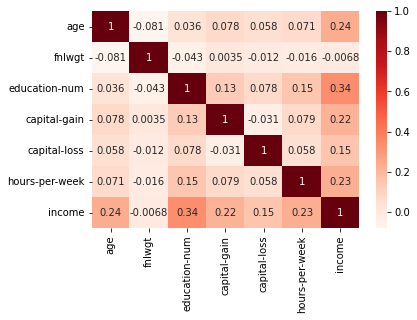

In [119]:
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

## Mutual information

In [120]:
from sklearn.metrics import mutual_info_score

In [121]:
cat = ["workclass", "education", "marital-status", "occupation", "relationship", "race", "sex",	"native-country"]

In [122]:
def calculate_mi(series):
    return mutual_info_score(series, df_full_train.income)

In [123]:
df_mi = df_full_train[cat].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')
df_mi

,MI
relationship,0.116779
marital-status,0.110455
education,0.065911
occupation,0.064993
sex,0.025746
workclass,0.015282
native-country,0.006220
race,0.005668


## Classification

In [124]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [125]:
num = ["age",	"fnlwgt",	"education-num",	"capital-gain", "capital-loss", "hours-per-week"]

In [126]:
train_dict = df_train[cat + num].to_dict(orient='records')

dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

X_train = dv.transform(train_dict)

In [127]:
model = LogisticRegression(solver='lbfgs', C=1.0, random_state=42)
model.fit(X_train, y_train)

val_dict = df_val[cat + num].to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model.predict(X_val)

score = roc_auc_score(y_val, y_pred)

In [128]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred)

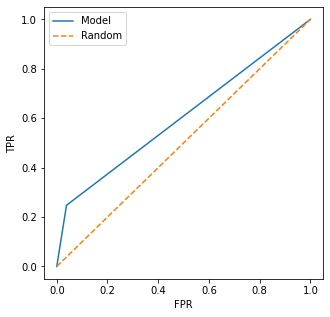

In [129]:
plt.figure(figsize=(5, 5))

plt.plot(fpr, tpr, label='Model')
plt.plot([0, 1], [0, 1], label='Random', linestyle='--')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()

In [130]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[4559  455]
 [1368  126]]


## Feature elimination

In [131]:
features = cat + num
features

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country',
 'age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

In [132]:
orig_score = score

for c in features:
    subset = features.copy()
    subset.remove(c)
    
    train_dict = df_train[subset].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    dv.fit(train_dict)

    X_train = dv.transform(train_dict)

    model = LogisticRegression(solver='lbfgs', C=1.0, random_state=42)
    model.fit(X_train, y_train)

    val_dict = df_val[subset].to_dict(orient='records')
    X_val = dv.transform(val_dict)

    y_pred = model.predict(X_val)

    score = roc_auc_score(y_val, y_pred)
    print(c, orig_score - score, score)

workclass -0.0002030869212023001 0.604748746604961
education -0.0015452042767233332 0.6060908639604821
marital-status -0.0015452042767233332 0.6060908639604821
occupation -0.0015452042767233332 0.6060908639604821
relationship -0.0015452042767233332 0.6060908639604821
race -0.0012516000787732295 0.605797259762532
sex -0.0015452042767233332 0.6060908639604821
native-country -0.0002030869212023001 0.604748746604961
age -0.0007328565919142438 0.605278516275673
fnlwgt -0.12763269371210073 0.7321783533958595
education-num -0.00041720002625766917 0.6049628597100164
capital-gain 0.08260457950750388 0.5219410801762548
capital-loss 0.019934571137861123 0.5846110885458976
hours-per-week -0.0003266827495097546 0.6048723424332685


## Ridge Regression

In [133]:
train_dict = df_train[cat + num].to_dict(orient='records')

In [134]:
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

X_train = dv.transform(train_dict)

val_dict = df_val[cat + num].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [135]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [136]:
for a in [0, 0.01, 0.1, 1, 10, 1e-10]:
    model = Ridge(alpha=a,random_state=42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_val)
    
    sqrt = np.sqrt(mean_squared_error(y_val, y_pred))
    score = roc_auc_score(y_val, y_pred >= 0.5)
    
    print(a, round(sqrt, 3), round(score, 5))
    print(confusion_matrix)
    print()

0 0.343 0.72733
[[4559  455]
 [1368  126]]

0.01 0.343 0.72723
[[4559  455]
 [1368  126]]

0.1 0.342 0.72733
[[4559  455]
 [1368  126]]

1 0.342 0.72743
[[4559  455]
 [1368  126]]

10 0.342 0.7269
[[4559  455]
 [1368  126]]

1e-10 0.343 0.72723
[[4559  455]
 [1368  126]]



## Decision Trees

In [137]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text

In [138]:
dt = DecisionTreeRegressor(max_depth=1)
dt.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=1,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [139]:
print(export_text(dt, feature_names=dv.get_feature_names()))

|--- marital-status=married-civ-spouse <= 0.50
|   |--- value: [0.07]
|--- marital-status=married-civ-spouse >  0.50
|   |--- value: [0.45]



In [140]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [141]:
rf = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1)
rf.fit(X_train, y_train)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=-1, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

In [142]:
y_pred = rf.predict(X_val)
roc_auc_score(y_val, y_pred)

0.8771667092328648

In [143]:
scores = []

for n in range(10, 151, 10):
    rf = RandomForestRegressor(n_estimators=n, random_state=1, n_jobs=-1)

    
    rf.fit(X_train, y_train)
    
    y_pred = rf.predict(X_val)
    auc = roc_auc_score(y_val, y_pred)
    
    scores.append((n, auc))
    print((n, auc))


df_scores = pd.DataFrame(scores, columns=['n_estimators', 'auc'])

(10, 0.8771667092328648)
(20, 0.8884701503253494)
(30, 0.8937649622750659)
(40, 0.8962141213105876)
(50, 0.8969815949913431)
(60, 0.8969019756870082)
(70, 0.8974737987100905)
(80, 0.897642845493932)
(90, 0.898131587503795)
(100, 0.8981049195242432)
(110, 0.898133190146797)
(120, 0.897910294558091)
(130, 0.8982783896027703)
(140, 0.8983267253157079)
(150, 0.898501092874316)


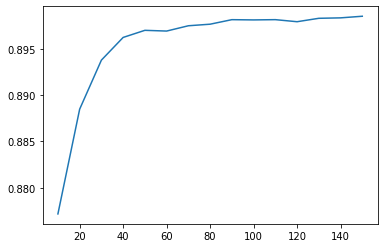

In [144]:
plt.plot(df_scores.n_estimators, df_scores.auc)

In [145]:
scores = []
max_depths = [5, 10, 15]

for d in max_depths:
    for n in range(10, 151, 10):

        rf = RandomForestRegressor(n_estimators=n,
                                  max_depth=d,
                                  random_state=1, n_jobs=-1,
                                  warm_start=True)

        rf.fit(X_train, y_train)

        y_pred = rf.predict(X_val)
        auc = roc_auc_score(y_val, y_pred)

        scores.append((d, n, auc))

columns = ['max_depth', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

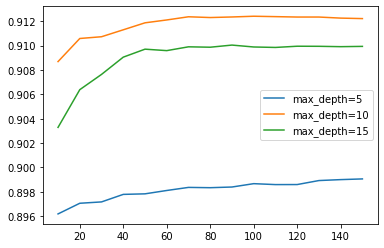

In [146]:
for d in max_depths:
    df_subset = df_scores[df_scores.max_depth == d]
    plt.plot(df_subset.n_estimators, df_subset.auc, label='max_depth=%d' % d)

plt.legend()

In [147]:
max_depth = 10
scores = []

for s in [1, 3, 5, 10, 50]:
    for n in range(10, 151, 10):
        rf = RandomForestRegressor(n_estimators=n,
                                    max_depth=max_depth,
                                    min_samples_leaf=s,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict(X_val)
        auc = roc_auc_score(y_val, y_pred)

        scores.append((s, n, auc))

In [148]:
columns = ['min_samples_leaf', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

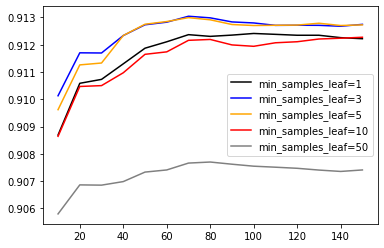

In [149]:
colors = ['black', 'blue', 'orange', 'red', 'grey']
values = [1, 3, 5, 10, 50]

for s, col in zip(values, colors):
    df_subset = df_scores[df_scores.min_samples_leaf == s]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             color=col,
             label='min_samples_leaf=%d' % s)

plt.legend()

In [150]:
min_samples_leaf = 3
max_depth = 10
n_estimators = 70

rf = RandomForestRegressor(n_estimators=n_estimators,
                            max_depth=max_depth,
                            min_samples_leaf=min_samples_leaf,
                            random_state=1)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=3,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=70, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

In [151]:
y_pred = rf.predict(X_val)
roc_auc_score(y_val, y_pred)

0.9130429626279037

## Boosting

In [152]:
!pip install xgboost==1.0.0
import xgboost as xgb

In [153]:
xgb.__version__

'1.0.0'

In [154]:
features = dv.get_feature_names()
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [155]:
etas = [0.01, 0.1, 0.3]
max_depths = [3, 6, 10]
min_child_weights = [1, 30]
num_boost_round = 10

scores = []

for e in etas:
    for m in max_depths:
        for w in min_child_weights:
            xgb_params = {
                'eta': e, 
                'max_depth': m,
                'min_child_weight': w,
                
                'objective': 'binary:logistic',
                'nthread': 8,
                
                'seed': 1,
                'verbosity': 1,
            }

            model = xgb.train(xgb_params, dtrain, num_boost_round=num_boost_round)

            y_pred = model.predict(dval)
            auc = roc_auc_score(y_val, y_pred)

            scores.append((e, m, w, auc))

scores

[(0.01, 3, 1, 0.855797452079692),
 (0.01, 3, 30, 0.8557182815153975),
 (0.01, 6, 1, 0.8985208374360993),
 (0.01, 6, 30, 0.8957407005678228),
 (0.01, 10, 1, 0.9017032376978559),
 (0.01, 10, 30, 0.8988360452617156),
 (0.1, 3, 1, 0.8796560625548744),
 (0.1, 3, 30, 0.8795132991162641),
 (0.1, 6, 1, 0.9039641182335131),
 (0.1, 6, 30, 0.9006973548441358),
 (0.1, 10, 1, 0.9098030595352387),
 (0.1, 10, 30, 0.9048443538758832),
 (0.3, 3, 1, 0.9029502221647835),
 (0.3, 3, 30, 0.9038855887264194),
 (0.3, 6, 1, 0.9138308860333637),
 (0.3, 6, 30, 0.9082761894944571),
 (0.3, 10, 1, 0.9154259004545865),
 (0.3, 10, 30, 0.9105649560183475)]

## Final model

In [156]:
df_full_train = df_full_train.reset_index(drop=True)
y_full_train = df_full_train.income.values
del df_full_train['income']

In [157]:
dicts_full_train = df_full_train.to_dict(orient='records')

dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

dicts_test = df_test.to_dict(orient='records')
X_test = dv.transform(dicts_test)

In [158]:
dfulltrain = xgb.DMatrix(X_full_train, label=y_full_train,
                    feature_names=dv.get_feature_names())

dtest = xgb.DMatrix(X_test, feature_names=dv.get_feature_names())

In [160]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 10,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dfulltrain, num_boost_round=10)

y_pred = model.predict(dtest)
roc_auc_score(y_test, y_pred)

0.9196602257988208

## Save model

In [161]:
import pickle
from google.colab import files

In [162]:
f_out = open('model.bin', 'wb') 
pickle.dump((dv, model), f_out)
f_out.close()

In [163]:
files.download('model.bin')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>